David Lattimer  
1/21/2021  
DSC 540
# Week 5-6 Activities

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt

# SQL Lite Database 

In [2]:
# Insert data into a SQL Lite database – create a table with the following data 
#    a. Name, Address, City, State, Zip, Phone Number
#    b. Add at least 10 rows of data and submit your code with a query generating your results.

In [3]:
query = '''
.....: CREATE TABLE new
.....: (a VARCHAR(20), b VARCHAR(20),
.....:  c VARCHAR(20), d VARCHAR(20),
.....:  e INTEGER,     f VARCHAR(20) 
.....: );'''

In [4]:
conn = sqlite3.connect('mydata.sqlite')

In [5]:
conn.execute(query)

In [6]:
conn.commit()

In [7]:
data = [('David Lattimer', '20680 Pitchfork Dr.', 'Riverside', 'CA', 92507, '951-452-2976'),
        ('Jeffery Lebowski', '10 White Russian Way', 'Los Angeles', 'CA', 90001, '626-843-3833'),
        ('Harry Kane', '12 White Hart Lane', 'London', 'COYS', 70773, '102-030-4050'),
       ('Frank Gonzalez', '1920 Westminster Blvd.', 'Pomona', 'CA', 91750, '888-928-0982'),
       ('Barthalomew Bittersburg', '10 Oldsville Ln.', 'Yorkshire', 'MI', 48009, '123-456-7890'),
        ('Jimmy Bobby', '40 Fake St.', 'San Diego', 'CA', 22434, '573-293-0445'),
        ('First Last', '100 Via Address', 'Salt Lake City', 'UT', 10000, '808-808-8008'),
        ('Donald Trump', '30 Loser St.', 'New York', 'NY', 10001, '100-530-9299'),
        ('Jack Black', '420 Tenacious Dr.', 'Los Angeles', 'CA', 90001, '900-420-6969'),
        ('Bellevue Bruin', '1000 Galvin Rd S', 'Bellevue', 'NE', 68005, '402-293-2000')]

In [8]:
stmt = 'INSERT INTO new VALUES(?, ?, ?, ?, ?, ?)'

In [9]:
conn.executemany(stmt, data)

In [10]:
conn.commit()

In [11]:
cursor = conn.execute('select * from new')
rows = cursor.fetchall()

In [12]:
rows

[('David Lattimer',
  '20680 Pitchfork Dr.',
  'Riverside',
  'CA',
  92507,
  '951-452-2976'),
 ('Jeffery Lebowski',
  '10 White Russian Way',
  'Los Angeles',
  'CA',
  90001,
  '626-843-3833'),
 ('Harry Kane', '12 White Hart Lane', 'London', 'COYS', 70773, '102-030-4050'),
 ('Frank Gonzalez',
  '1920 Westminster Blvd.',
  'Pomona',
  'CA',
  91750,
  '888-928-0982'),
 ('Barthalomew Bittersburg',
  '10 Oldsville Ln.',
  'Yorkshire',
  'MI',
  48009,
  '123-456-7890'),
 ('Jimmy Bobby', '40 Fake St.', 'San Diego', 'CA', 22434, '573-293-0445'),
 ('First Last',
  '100 Via Address',
  'Salt Lake City',
  'UT',
  10000,
  '808-808-8008'),
 ('Donald Trump', '30 Loser St.', 'New York', 'NY', 10001, '100-530-9299'),
 ('Jack Black',
  '420 Tenacious Dr.',
  'Los Angeles',
  'CA',
  90001,
  '900-420-6969'),
 ('Bellevue Bruin',
  '1000 Galvin Rd S',
  'Bellevue',
  'NE',
  68005,
  '402-293-2000')]

In [13]:
cursor.description

(('a', None, None, None, None, None, None),
 ('b', None, None, None, None, None, None),
 ('c', None, None, None, None, None, None),
 ('d', None, None, None, None, None, None),
 ('e', None, None, None, None, None, None),
 ('f', None, None, None, None, None, None))

In [14]:
pd.DataFrame(rows, columns=[x[0] for x in cursor.description])

,a,b,c,d,e,f
0,David Lattimer,20680 Pitchfork Dr.,Riverside,CA,92507,951-452-2976
1,Jeffery Lebowski,10 White Russian Way,Los Angeles,CA,90001,626-843-3833
2,Harry Kane,12 White Hart Lane,London,COYS,70773,102-030-4050
3,Frank Gonzalez,1920 Westminster Blvd.,Pomona,CA,91750,888-928-0982
4,Barthalomew Bittersburg,10 Oldsville Ln.,Yorkshire,MI,48009,123-456-7890
5,Jimmy Bobby,40 Fake St.,San Diego,CA,22434,573-293-0445
6,First Last,100 Via Address,Salt Lake City,UT,10000,808-808-8008
7,Donald Trump,30 Loser St.,New York,NY,10001,100-530-9299
8,Jack Black,420 Tenacious Dr.,Los Angeles,CA,90001,900-420-6969
9,Bellevue Bruin,1000 Galvin Rd S,Bellevue,NE,68005,402-293-2000


# Activity 7

In [15]:
from bs4 import BeautifulSoup
from urllib.request import urlopen

In [16]:
# I'm doing this the way it wants in the answer sheet, even though I feel like just putting it
# Into pd.read_html and going from there is a lot easier
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'
html = urlopen(url)
soup = BeautifulSoup(html, 'html.parser')

In [17]:
# Find how many tables are on the webpage
all_tables = soup.find_all('table')
print('There are ' + str(len(all_tables)) + ' tables in total')

There are 10 tables in total


In [18]:
# Make sure they are actually tables
data_table = soup.find('table', {'class': 'wikitable'})
print(type(data_table))

<class 'bs4.element.Tag'>


In [19]:
sources = data_table.tbody.findAll('tr', recursive=False)[0]
sources_list = [td for td in sources.findAll('td')]
print('There are only ' + str(len(sources_list)) + ' of the tables we want')

There are only 3 of the tables we want


In [20]:
# This finds all our tables
data = data_table.tbody.findAll('tr', recursive=False)[1].findAll('td', recursive=False)

In [21]:
# This takes all the information from the tables
data_tables = []
for td in data:
    data_tables.append(td.findAll('table'))

In [22]:
# Hey look still 3 tables
len(data_tables)

3

In [23]:
# This takes the titles from the tables. Looking at the page, this is above the top of the table
source_names = [source.findAll('a')[0].getText() for source in sources_list]
print(source_names)

['International Monetary Fund', 'World Bank', 'United Nations']


In [24]:
# This takes all the rows under the headers and has all the data we will use to make the datatable
rows1 = data_tables[0][0].findAll('tbody')[0].findAll('tr')[1:]

In [25]:
data_rows1 = [[td.get_text().strip() for td in tr.findAll('td')] for tr in rows1]

In [26]:
#This makes our dataframe. I wasn't able to make the header1 work so I added it here. Sorry
df1 = pd.DataFrame(data_rows1, columns = ['Rank', 'Country/Territory', 'GDP (US$million)'])

In [27]:
df1

,Rank,Country/Territory,GDP (US$million)
0,,World[19],"83,844,988"
1,1,United States,"20,807,269"
2,2,China[n 2][n 3],"14,860,775"
3,3,Japan,"4,910,580"
4,4,Germany,"3,780,553"
...,...,...,...
191,191,Marshall Islands,225
192,192,Kiribati,194
193,193,Nauru,114
194,194,Tuvalu,45


In [28]:
#Why would we just use this? 
list_of_df = pd.read_html(url)
len(list_of_df)

10

In [29]:
#Look for the 3 data frames, around 200x3
for t in list_of_df:
    print(t.shape)

(1, 1)
(1, 3)
(605, 3)
(196, 3)
(191, 3)
(213, 3)
(7, 2)
(9, 2)
(12, 2)
(2, 2)


In [30]:
# Set our dataframes
df_1 = list_of_df[3]
df_2 = list_of_df[4]
df_3 = list_of_df[5]

In [31]:
# The only real difference between this and the other method working with all the html is
# we don't have the titles of the table. But this is a lot easier for now
df_1.head()

,Rank,Country/Territory,GDP(US$million)
0,NaN,World[19],83844988.0
1,1,United States,20807269.0
2,2,China[n 2][n 3],14860775.0
3,3,Japan,4910580.0
4,4,Germany,3780553.0


In [32]:
df_2.head()

,Rank,Country/Territory,GDP(US$million)
0,NaN,World,87751541
1,1.0,United States,21427700
2,2.0,China[n 9],14342903
3,3.0,Japan,5081770
4,4.0,Germany,3845630


In [33]:
df_3.head()

,Rank,Country/Territory,GDP(US$million)
0,NaN,World[22],87445260
1,1.0,United States,21433226
2,2.0,China[n 9],14342933
3,3.0,Japan,5082465
4,4.0,Germany,3861123


**Explanation:** It seems like it is a lot easier to just run the explanation used in the book, without using the complex way that wasn't really explained in the chapter and was completely new in the answers in the back of the book. I wanted to try it that way since maybe it'll help or learn something new but it was very convoluted. Is using this method I did at the end alright? It makes the dataframes and we can work with them from there. The only real downside is we don't end up with the titles of the tables from the webpage, but we can either name the df the title we want or can probably find a way to add it. Also it doesn't seem to be part of the assignment but from here would want to work with the dataframes such as removing the [n 9] from China and the hyperlinks that pop up on Wikipedia all the time, formatting the large numbers to be more readable and probably changing the rank from float to an integer. But thats for another time. 

# Activity 8

In [34]:
#Read the visit_data.csv file

vd = pd.read_csv('visit_data.csv')

In [35]:
# We will use this to look at the row names and make sure the dataframe worked
vd.head()

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0


In [36]:
#Here are the rows where the first names are duplicated. Many of them are 'NaN' which will show as duplicates
#This means we are missing a lot of data on names in our dataset we didn't get
print('There are {} duplicated values in the first name column'.format(len(vd[vd.first_name.duplicated() == 1].head())))

There are 5 duplicated values in the first name column


In [37]:
#Here are the rows with last names duplicated. A lot more NaN's, the email is the important part 
#of the dataframe so we need to have no NaNs there
print('There are {} duplicated values in the last name column'.format(len(vd[vd.last_name.duplicated() == 1].head())))

There are 5 duplicated values in the last name column


In [38]:
#Here is the moment of truth, emails
print('There are {} duplicated values in the Email column'.format(len(vd[vd.email.duplicated() == 1])))

There are 0 duplicated values in the Email column


In [39]:
#Same here with IP Address which should all be unique (Unless we had two people in the same household)
print('There are {} duplicated values in the IP Address column'.format(len(vd[vd.ip_address.duplicated() == 1])))

There are 0 duplicated values in the IP Address column


In [40]:
#Check to see if there are any NaN's in essential columns (email, IP Address and visit)
#We did this alrady by looking for duplicates since NaNs would pop up but lets do it again

#Looking for email
print('There are {} missing values in the email column'.format(len(vd[vd.email.isnull()])))

There are 0 missing values in the email column


In [41]:
#Looking for IP Address
print('There are {} missing values in the IP Address column'.format(len(vd[vd.ip_address.isnull()])))

There are 0 missing values in the IP Address column


In [42]:
#NaNs in visit column
print('There are {} missing values in the visit column'.format(len(vd[vd.visit.isnull()])))

There are 26 missing values in the visit column


In [43]:
#Original shape of our dataframe
full_vd = vd.shape

In [44]:
#This removes the rows with NaNs in the visit column
vd = vd[np.isfinite(vd.visit)]

In [45]:
#This shows the difference between rows originally and now
print('The original dataframe had {} rows and the new dataframe removing missing visit values has {} rows.'
     .format(full_vd[0], vd.shape[0]))

The original dataframe had 1000 rows and the new dataframe removing missing visit values has 974 rows.


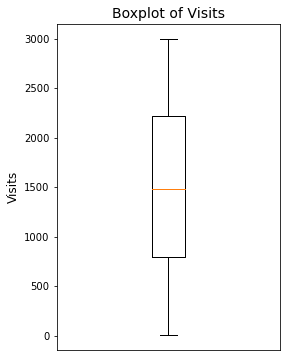

In [46]:
# Make our boxplot
plt.figure(figsize=(4,6))
plt.boxplot(vd.visit)
plt.xticks([],[])
plt.ylabel('Visits', fontsize=12)
plt.title('Boxplot of Visits', fontsize=14)
plt.show()

In [47]:
#Our boxplot doesn't show any outliers. Lets also look at the outlier formula (upper bound = 75% + 1.5(iqr))
vd.visit.describe()

count     974.000000
mean     1497.976386
std       838.959460
min         1.000000
25%       794.500000
50%      1477.000000
75%      2224.250000
max      2998.000000
Name: visit, dtype: float64

In [48]:
#Set our IQR, Upper bound and lower bounc
iqr = 2224-794
upper = 2224 + 1.5*iqr
lower = 794 - 1.5*iqr

In [49]:
print('Our upper bound is {} and our lower bound is {}'.format(upper, lower))

Our upper bound is 4369.0 and our lower bound is -1351.0


In [50]:
#Again, all our points are within this. The book wanted us to make our bounds to be 100-2900, for no real reason.
#So lets get rid of things outside of those limits

vd = vd[(vd.visit > 100) & (vd.visit < 2900)]

In [51]:
print('Our new dataframe without missing values in the key columns and without outliers has {} rows'
     .format(vd.shape[0]))

Our new dataframe without missing values in the key columns and without outliers has 923 rows
